<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [34]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



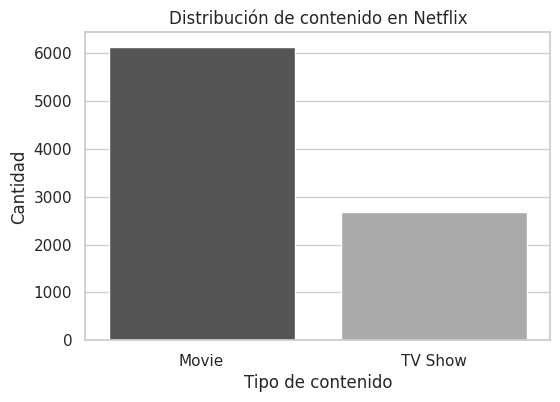

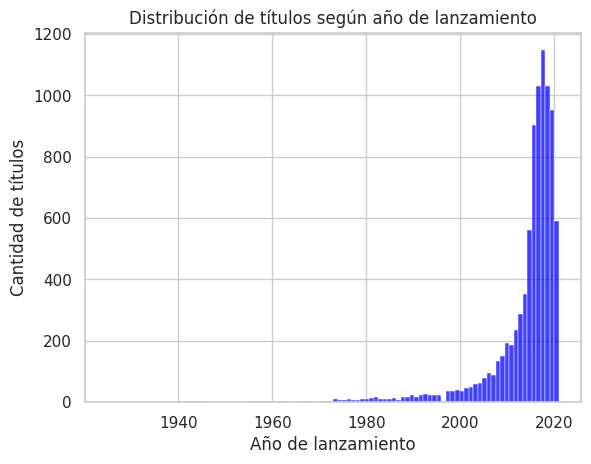

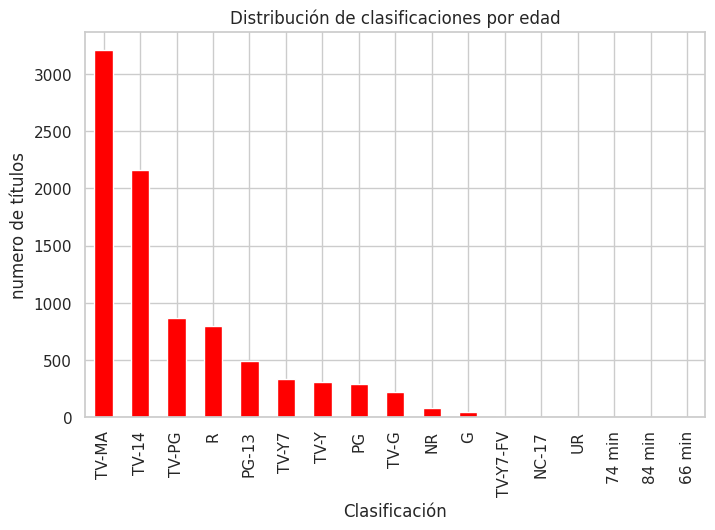

In [32]:
# FIXME
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", hue="type", palette="gray")
plt.title("Distribución de contenido en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()
sns.histplot(data=df, x="release_year", bins=100, kde=False, color="blue")
plt.title("Distribución de títulos según año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.show()
plt.figure(figsize=(8,5))
df['rating'].value_counts().plot(kind="bar", color="red")
plt.title("Distribución de clasificaciones por edad")
plt.xlabel("Clasificación")
plt.ylabel("numero de títulos")
plt.show()



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


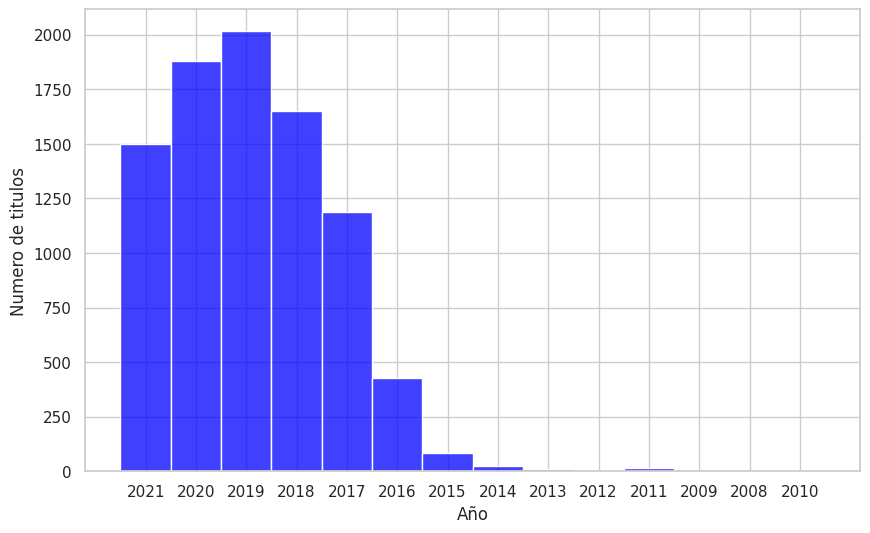

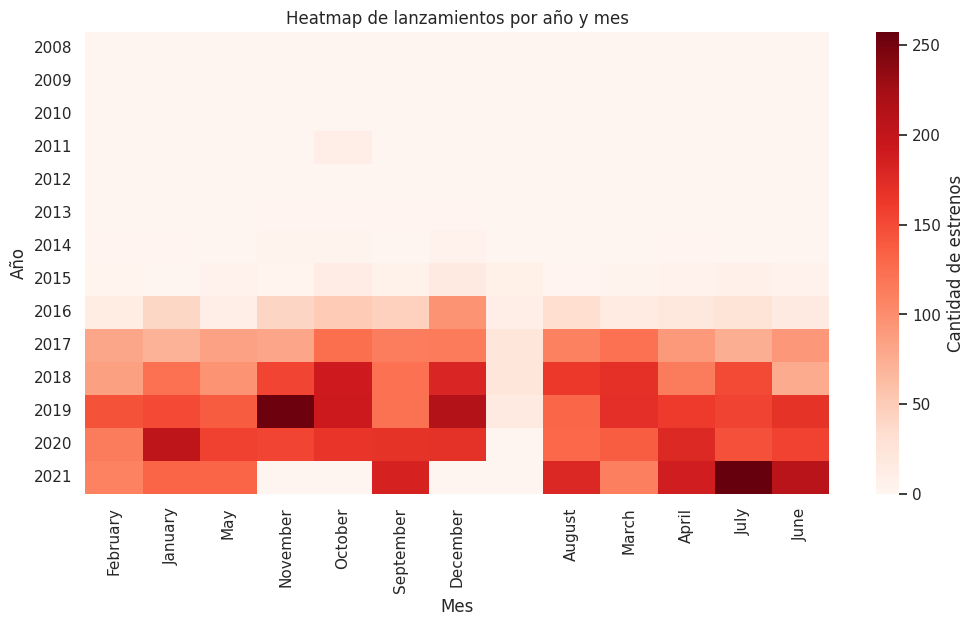

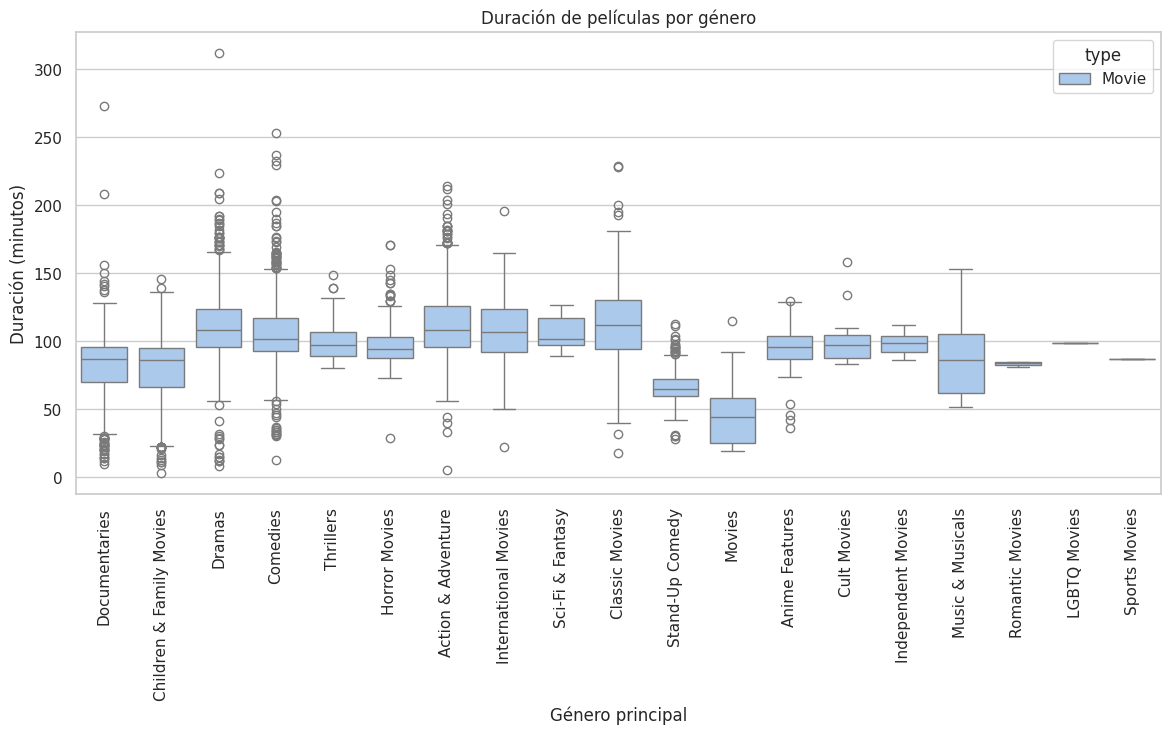

In [98]:
# FIXME
#p1
df['date_added'] = df['date_added'].fillna('no')
i = 0
a = 0
df = df.assign(year_added = 'no')
df = df.assign(month_added = 'no')
while i < df.shape[0]:
  valor = df.date_added[i]
  tex = ''
  mes = ''
  a = 0
  if valor == 'no':
    a += 1
  else:
    tex = tex + df.date_added[i][len(df.date_added[i]) - 4]
    tex = tex + df.date_added[i][len(df.date_added[i]) - 3]
    tex = tex + df.date_added[i][len(df.date_added[i]) - 2]
    tex = tex + df.date_added[i][len(df.date_added[i]) - 1]
    df.loc[i, 'year_added'] = tex
    while a < len(df.date_added[i]):
      if df.date_added[i][a] == ' ':
        a = len(df.date_added[i])
      else:
        mes = mes + df.date_added[i][a]
      a += 1
    df.loc[i, 'month_added'] = mes
  i += 1
  df['year_added'] = df['year_added'].replace('no', pd.NA)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="year_added", bins=100, kde=False, color="blue")
plt.xlabel("Año")
plt.ylabel("Numero de titulos")
#p2
ht = df.groupby(['year_added','month_added']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(ht, cmap="Reds", cbar_kws={'label': 'Cantidad de estrenos'})
plt.title("Heatmap de lanzamientos por año y mes")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()
#p3
pelis = df[df['type']=="Movie"].copy()
pelis['duration_min'] = pelis.duration.str.replace(" min","", regex=False)
pelis['duration_min'] = pd.to_numeric(pelis['duration_min'], errors="coerce")
#solo agarre el primero, porque de lo contrario no se como hacerlo
pelis['main_gen'] = pelis['listed_in'].str.split(",").str[0]
plt.figure(figsize=(14,6))
sns.boxplot(data=pelis, x="main_gen", y="duration_min", hue="type", palette="pastel")
plt.title("Duración de películas por género")
plt.xlabel("Género principal")
plt.ylabel("Duración (minutos)")
plt.xticks(rotation=90)
plt.show()



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



/tmp/ipython-input-449090899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_globales.index, y=top_globales.values, palette="bone")


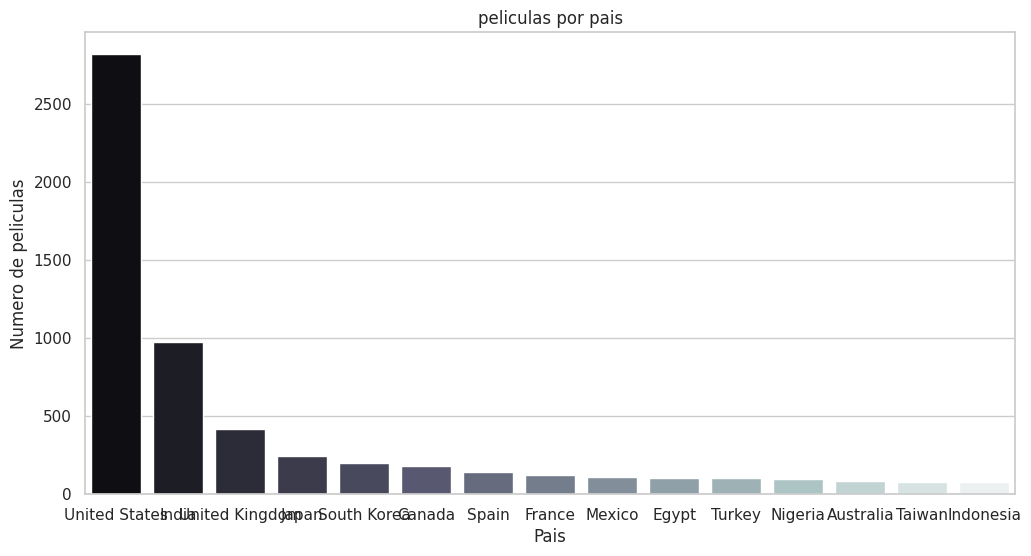

<Figure size 1000x600 with 0 Axes>

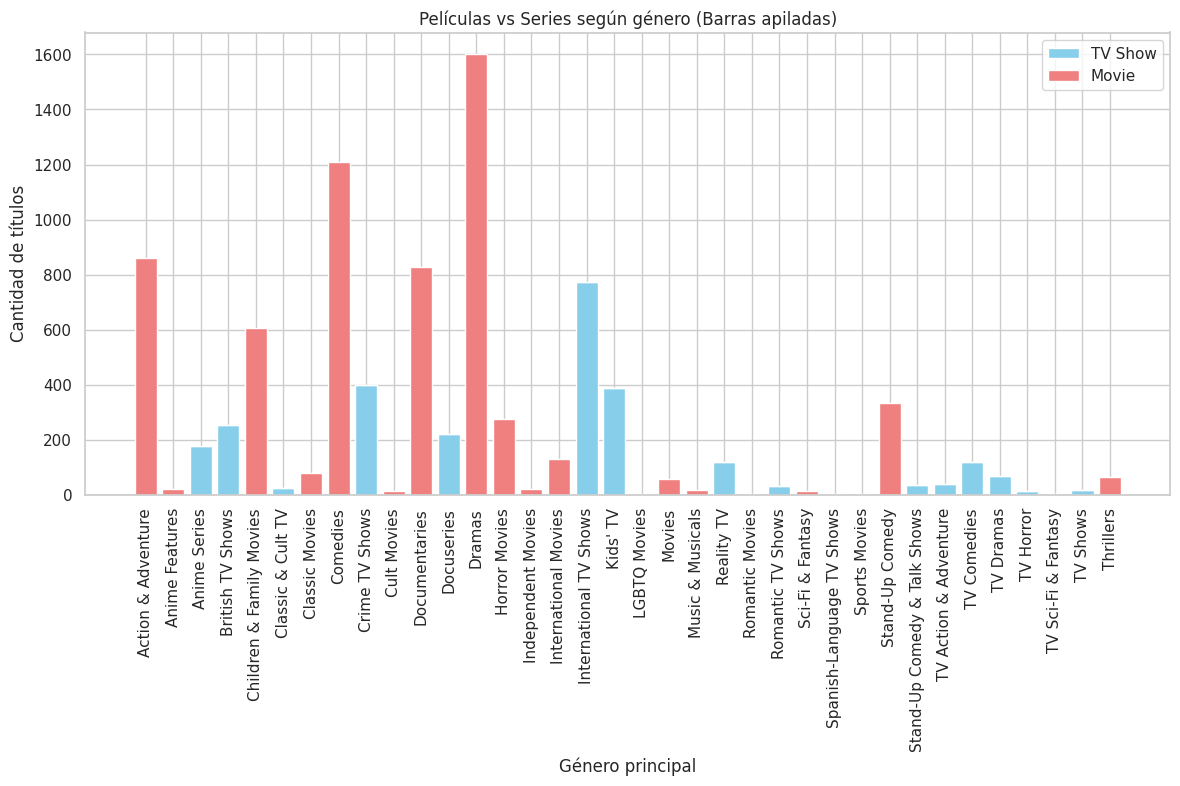

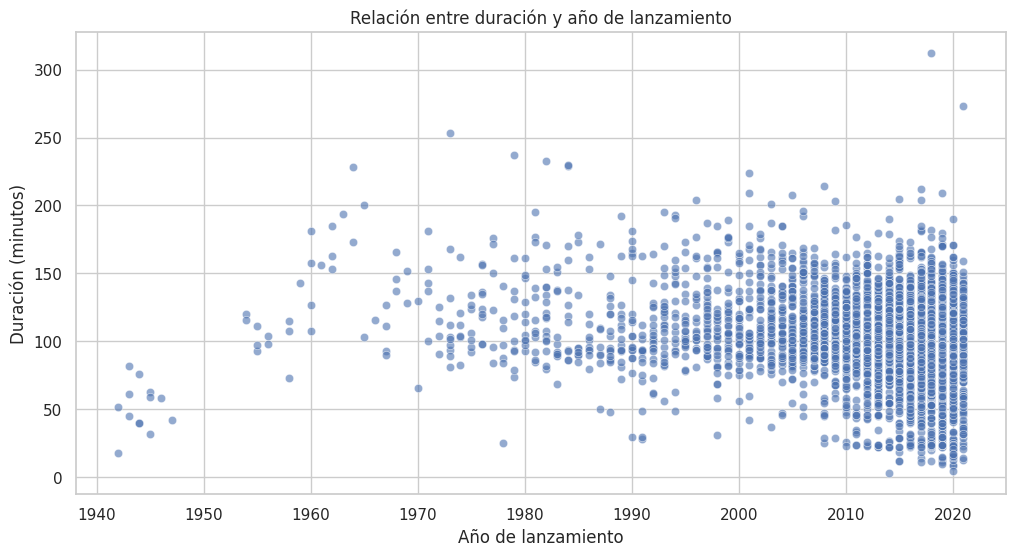

In [100]:
# FIXME
#p1
top_globales = df.country.value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_globales.index, y=top_globales.values, palette="bone")
plt.title("peliculas por pais")
plt.xlabel("Pais")
plt.ylabel("Numero de peliculas")
plt.figure(figsize=(10,6))
plt.show()
#agarre el top 15 porque o si no sale un grafico enorme
#P2
df['main_gen'] = df['listed_in'].str.split(",").str[0]
GTC = df.groupby(['main_gen','type']).size().unstack(fill_value=0)
gen = GTC.index
tv_conteo = GTC['TV Show']
movie_conteo = GTC['Movie']
plt.figure(figsize=(14,6))
plt.bar(gen, tv_conteo, label='TV Show', color='skyblue')
plt.bar(gen, movie_conteo, bottom = tv_conteo, label='Movie', color='lightcoral')
plt.title("Películas vs Series según género (Barras apiladas)")
plt.xlabel("Género principal")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=90)
plt.legend()
plt.show()
movies = df[df['type'] == "Movie"].copy()
movies['duration_min'] = movies.duration.str.replace(" min","", regex=False)
movies['duration_min'] = pd.to_numeric(movies['duration_min'], errors="coerce")
movies = movies.dropna(subset=['duration_min'])
#p3
plt.figure(figsize=(12,6))
sns.scatterplot(data=movies, x="release_year", y="duration_min", alpha=0.6)
plt.title("Relación entre duración y año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (minutos)")
plt.show()

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME